# Imports


In [101]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.4.1


In [102]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [103]:
def pprint_numpy_matrix(mat, fmt="g"):
    """Pretty print a numpy matrix"""

    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]

    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# Data Analysis

In [104]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [105]:
X_train.shape

(60000, 28, 28)

In [106]:
y_train.shape

(60000,)

In [107]:
y_train[0]

5

In [108]:
pprint_numpy_matrix(X_train[0])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


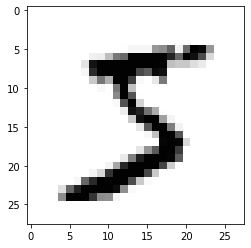

Cette image représente le chiffre 5


In [109]:
# index can goes from 0 to 59 999
index = 0

# plot the image
plt.imshow(X_train[index], cmap='Greys', interpolation='nearest')
plt.show()

print('Cette image représente le chiffre', y_train[index])

# Cleaning

In [110]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [111]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [112]:
# Reshape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [113]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [114]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [115]:
print("min", X_train[0].min())
print("max", X_train[0].max())

min 0.0
max 1.0


In [116]:
print("max", X_train[0].max())

max 1.0


# Data Gen

In [117]:
epochs = 30
batch_size = 32
learning_rate = 0.00001

In [118]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10
).flow(
    X_train,
    y=y_train,
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

In [119]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(

).flow(
    X_test,
    y=y_test,
    batch_size=batch_size,
    shuffle=False,
    seed=42
)

In [145]:
a = iter(train_datagen)
# a.next()[0]

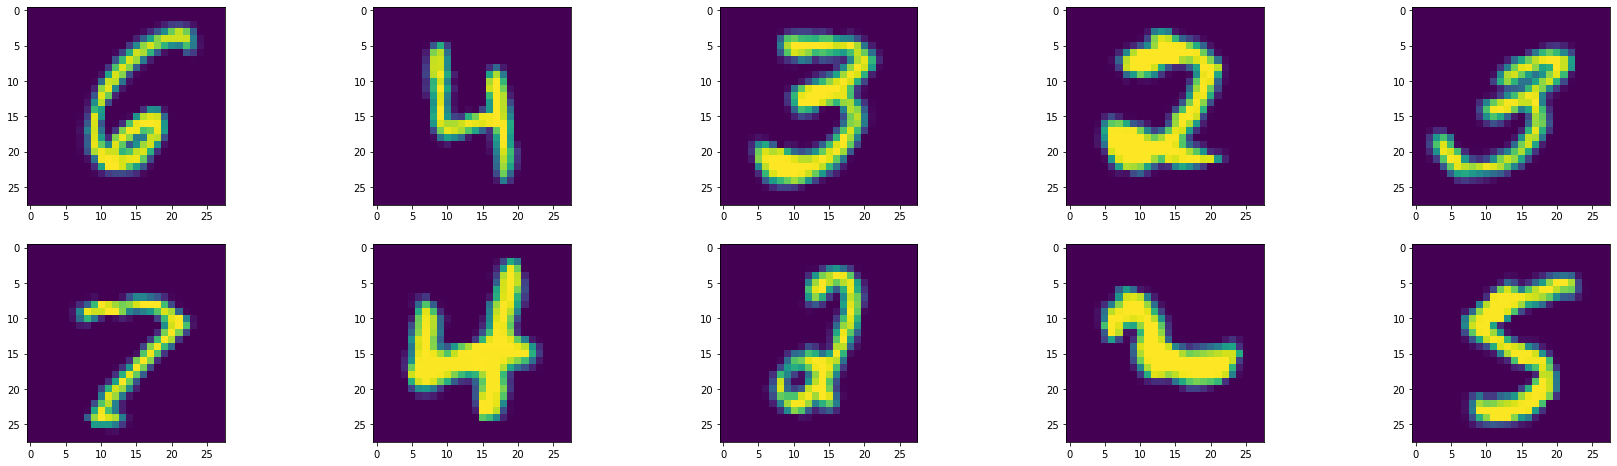

In [144]:
fig=plt.figure(figsize=(30, 8))
columns = 5
rows = 2
batch = a.next()[0]
for i in range(1, columns*rows +1):
    
    # Print the image
    fig.add_subplot(rows, columns, i)
    plt.imshow(batch[i].squeeze())
    
plt.show()

# Model creation

In [120]:
def create_model():

  # Init a sequential model
  model = keras.Sequential([


    # Part 1: Feature detector
    # --------------------------------------------------------------------------

    # First VGG block
    # Hidden layer 1: 32 filters, 3x3 kernel, relu activation function
    layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), kernel_initializer='he_uniform', activation='relu'),
    
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Second VGG block
    layers.Conv2D(64, (3, 3),  kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),

    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),


    # Third VGG block
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    
    layers.Dropout(0.2),
    layers.Flatten(),


    # Part 2: classifier
    # --------------------------------------------------------------------------

    # Simple ANN
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.4),

    # Output layer
    layers.Dense(10, activation='softmax')

  ])



  return model

In [121]:
model = create_model()

In [122]:
# Compile model 
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
dropout_18 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)         

In [124]:
cnn = model.fit(train_datagen, epochs=epochs, validation_data=test_datagen)

Epoch 1/30
1875/1875 [==============================] - 20s 10ms/step - loss: 2.2061 - accuracy: 0.3011 - val_loss: 0.4325 - val_accuracy: 0.8717
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7358 - accuracy: 0.7618 - val_loss: 0.2120 - val_accuracy: 0.9331
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4368 - accuracy: 0.8631 - val_loss: 0.1436 - val_accuracy: 0.9554
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3159 - accuracy: 0.9037 - val_loss: 0.1115 - val_accuracy: 0.9652
Epoch 5/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2438 - accuracy: 0.9245 - val_loss: 0.0903 - val_accuracy: 0.9730
Epoch 6/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1980 - accuracy: 0.9396 - val_loss: 0.0785 - val_accuracy: 0.9766
Epoch 7/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1770 - accuracy: 0.9461 - val_loss: 0.0672 -

In [125]:
scores = model.evaluate(X_test, y_test)
print('Accuracy : %.2f%%' % (scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9898
Accuracy : 98.98%


# Model evaluation

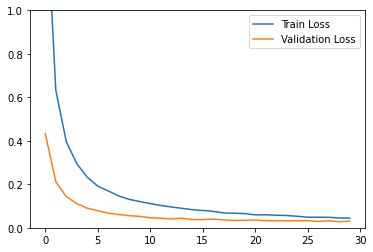

In [126]:
plt.plot(cnn.history['loss'], label='Train Loss')
plt.plot(cnn.history['val_loss'], label='Validation Loss')
plt.ylim([0, 1])

plt.legend()
plt.show()


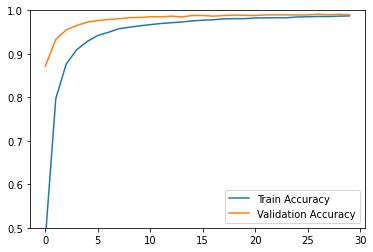

In [127]:
plt.plot(cnn.history['accuracy'], label='Train Accuracy')
plt.plot(cnn.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([0.5, 1])

plt.legend()
plt.show()

# Prediction

In [128]:
width, height, *_ = X_train[0].shape

prob = model.predict(X_test[11].reshape(1, width, height, 1))
predicted_class = np.argmax(prob, axis=-1)[0]

In [129]:
predicted_class

6

In [130]:
np.argmax(y_test[11])

6

In [131]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

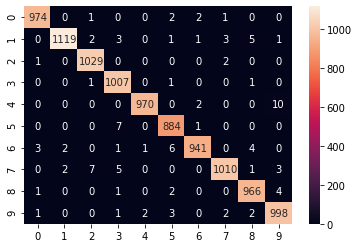

In [132]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cf_matrix, annot=True, fmt='g')

# Saving model

In [133]:
model.save('mnist_cnn_model.h5')